In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

#from 10_reducedCol
%store -r df2_dammy

In [14]:
df2_dammy.shape

(4608995, 649)

In [2]:
#make a new datafram by coping <df2_dammy>
model_timeSeries = df2_dammy.copy()
model_timeSeries.head(2)

,Date,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,...,Community Area_68.0,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0
0,2015-09-05 13:30:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-09-02 02:00:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#set the column as index
model_timeSeries.set_index('Date', inplace=True)
model_timeSeries.head(1)

,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,Location Description_AIRPORT PARKING LOT,...,Community Area_68.0,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,0,1,Persons,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
model_timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4608995 entries, 2015-09-05 13:30:00 to 2008-10-29 13:50:56
Columns: 648 entries, Arrest to Community Area_77.0
dtypes: int32(2), int64(1), object(1), uint8(644)
memory usage: 2.9+ GB


from here https://www.kaggle.com/code/mcarujo/time-series-chicago-crimes-prophetfb

In [6]:
#the number of crimes per Year and Months
aux = pd.DataFrame(model_timeSeries.resample("M").size(), columns=["Number of cases"])
aux["Month"] = aux.index.month.astype(str)
aux["Year"] = aux.index.year.astype(str)
aux["Year-Month"] = aux["Year"].str.cat(aux["Month"].str.zfill(2), sep="-")
aux.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2001-01-31,201,1,2001,2001-01
2001-02-28,92,2,2001,2001-02
2001-03-31,103,3,2001,2001-03
2001-04-30,133,4,2001,2001-04
2001-05-31,105,5,2001,2001-05


C:\Users\robso\AppData\Local\Temp\ipykernel_4496\837468102.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)


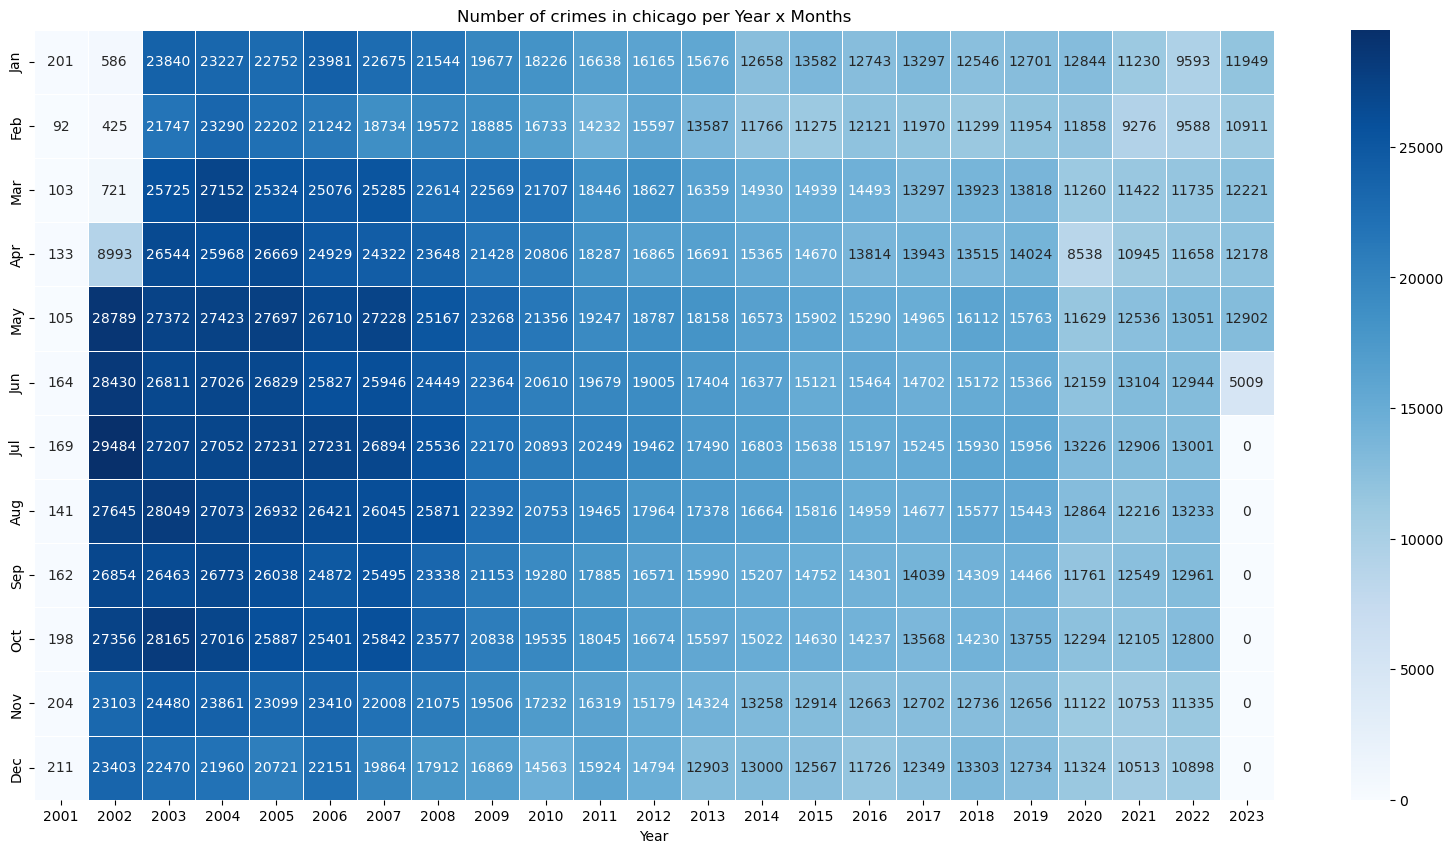

In [7]:
#heatmap
aux_csm = aux[["Month", "Year", "Number of cases"]]
aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)
aux_csm.index = aux_csm.index.astype(int)
aux_csm = aux_csm.sort_index()
aux_csm.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    aux_csm,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

- getting lighter colors towards recent year.
- Feb. is lighter color over yaer every year. summer time in chicago looks darker colors.
- during pandemic (march april , 2020 to 2022), lighter color becuse probably less ppl go out.
- getting normal: end of 2022 to 2023, getting darker colors

In [8]:
#bar
fig = px.bar(
    aux,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

- bar graph confirms # getting lower
- 2015-2020: kind of flat
- 2020- less then increase in the end

In [9]:
#aggregate by month
agg_months = aux.groupby(['Month'])['Number of cases'].sum().reset_index()
agg_months.Month = agg_months.Month.astype(int)
agg_months.sort_values('Month',inplace=True)
agg_months.Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(
    agg_months,
    x="Month",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
fig.show()

- Jul and Aug: about 700K
- Feb: 550K

In [10]:
#aggregate by year
fig = px.bar(
    aux.groupby(['Year'])['Number of cases'].sum().reset_index(),
    x="Year",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

fig.show()

In [12]:
data_model = pd.DataFrame(model_timeSeries.resample("M").size().reset_index())
data_model.columns = ["ds", "y"]
print(data_model.shape)
data_model.head()

(270, 2)


,ds,y
0,2001-01-31,201
1,2001-02-28,92
2,2001-03-31,103
3,2001-04-30,133
4,2001-05-31,105


In [13]:
fig = px.line(data_model, x="ds", y="y")
fig.update_layout(
    title="Chicago crimes from 2001 to 2023 (counted per Month).",
    xaxis_title="Date",
    yaxis_title="Crimes",
    font=dict(
        size=14,
    )
)

untill here https://www.kaggle.com/code/mcarujo/time-series-chicago-crimes-prophetfb